In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Part 1:

In [23]:
# open and read lines from data file
with open("ASTR19_F24_group_project_data.txt") as f:
    lines = f.readlines()

In [24]:
# parse data into days, times, and heights
days, times, heights = [], [], []

with open("ASTR19_F24_group_project_data.txt") as f:
    for line in f:
        # ignore lines that start with #
        if line.strip().startswith("#") or not line.strip():
            continue
        parts = line.split()
        days.append(float(parts[0]))
        hours, minutes = map(int, parts[1].split(":"))
        times.append(hours + minutes / 60)
        heights.append(float(parts[2]))

In [25]:
# turn days, times, heights itno arrays
days = np.array(days)
times = np.array(times)
heights = np.array(heights)
time_decimal = days + times / 24

In [26]:
# function
def tidal_model(t, a1, b1, c1, a2, b2, c2, offset):
    return (a1 * np.sin(b1 * t + c1) + a2 * np.sin(b2 * t + c2) + offset)

Part 2:

In [27]:
popt, pcov = curve_fit(
    tidal_model,
    time_decimal,
    heights,
    p0=[5, 2 * np.pi / 12, 0, 1, 2 * np.pi / 24, 0, 0]
)

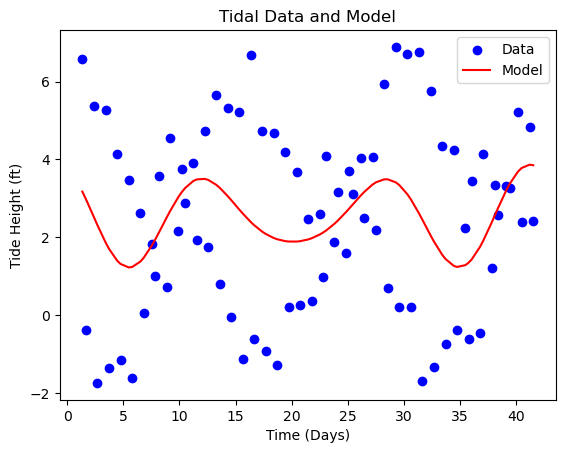

In [28]:
# plot data and model
plt.scatter(time_decimal, heights, label="Data", color="blue")
plt.plot(time_decimal, tidal_model(time_decimal, *popt), label="Model", color="red")
plt.xlabel("Time (Days)")
plt.ylabel("Tide Height (ft)")
plt.legend()
plt.title("Tidal Data and Model")
plt.savefig("tidal_model.pdf")
plt.show()

Part 3:

In [36]:
#residuals from the taking out the best fit

model_tmp = tidal_model(time_decimal, *popt)
res = heights - model_tmp

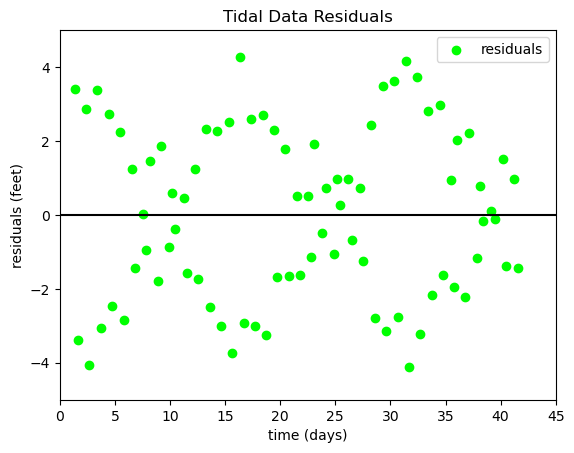

In [ ]:
#plot all the residuals


plt.scatter(time_decimal, res, color="lime", label="residuals")

plt.ylim(-5,5)
plt.xlim(0,45)
plt.axhline(0, color="black", linestyle="-")

plt.title("Tidal Data Residuals")
plt.xlabel("time (days)")
plt.ylabel("residuals (feet)")
plt.legend()

plt.savefig("tidal_data_residuals.pdf")
plt.show()

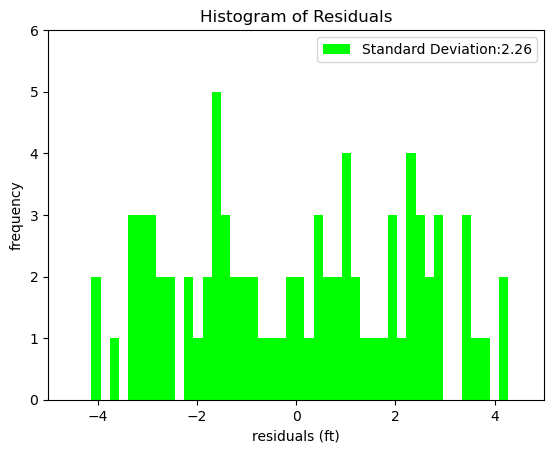

In [73]:
# histogram of residuals


plt.hist(res, label=f"Standard Deviation:{np.std(res):.2f}",bins=45, color="lime", )

plt.xlim(-5,5)
plt.ylim(0,6)

plt.title("Histogram of Residuals")
plt.xlabel("residuals (ft)")
plt.ylabel("frequency")
plt.legend()

plt.savefig("residuals_histogram.pdf")
plt.show()

Part 4:

In [69]:
tsunami_dev = (2 + 5.33) / np.std(res)
print(f"Tsunami deviation in terms of standard deviations: {tsunami_dev:.2f}")

Tsunami deviation in terms of standard deviations: 3.25


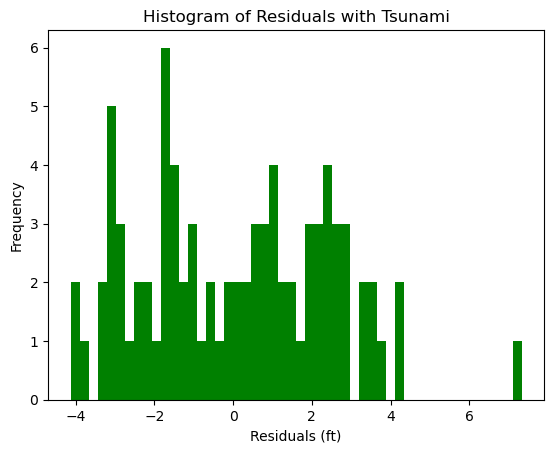

In [70]:
# histogram of residuals with tsunami data
residuals_with_tsunami = np.append(res, 2 + 5.33)
plt.hist(residuals_with_tsunami, bins=50, color="green")
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with Tsunami")
plt.savefig("residuals_histogram_with_tsunami.pdf")
plt.show()